In [49]:
import pandas as pd

col_list = ["wage_offer_unit_of_pay_9089" ]
visas_df = pd.read_csv('../data/us_perm_visas.csv', usecols=col_list)

C:\Users\andre\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (150) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [50]:

unit_abbreviations = {
    "Year": "long",
    "Month": "long",
    "Bi-Weekly": "long",
    "Week": "long",
    "Hour": "long",
    "yr": "short",
    "mth": "short",
    "bi": "short",
    "wk": "short",
    "hr": "short",
    }

visas_df["wage_offer_unit_of_pay_9089"]= visas_df["wage_offer_unit_of_pay_9089"].replace(unit_abbreviations)

In [51]:

visas_df["Langschreibweise"] = visas_df["wage_offer_unit_of_pay_9089"]== "long"
visas_df["Kurzschreibweise"] = visas_df["wage_offer_unit_of_pay_9089"]== "short"

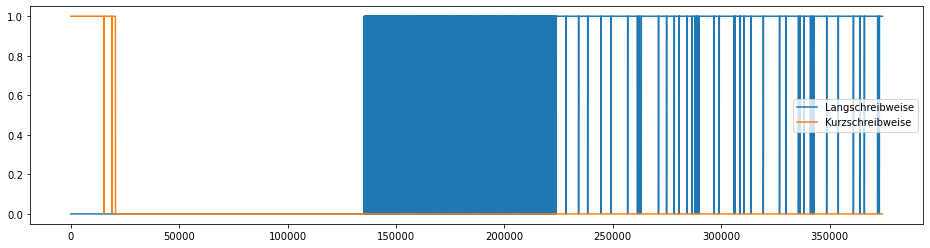

In [52]:

visas_df["Langschreibweise"].astype(int).plot(x='index', figsize=(16,4)).legend()
visas_df["Kurzschreibweise"].astype(int).plot(x='index', figsize=(16,4)).legend()

# Cleaning up wage_offer_from

wage offer from is represented in two columns wage_offer_from_9089 and wage_offered_from_9089. These both columns must be merged in order to work with them.

In [53]:
import pandas as pd
import importlib
import modules
import numpy as np
import matplotlib.pyplot as plt

In [54]:
col_list= ["wage_offer_from_9089", "wage_offered_from_9089"]
visas_df = pd.read_csv("../data/us_perm_visas.csv", usecols=col_list)
visas_df.head ()

C:\Users\andre\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (148) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,wage_offer_from_9089,wage_offered_from_9089
0,75629,NaN
1,37024,NaN
2,47923,NaN
3,10.97,NaN
4,100000,NaN


In [55]:
visas_df.dtypes

wage_offer_from_9089       object
wage_offered_from_9089    float64
dtype: object

wage_offered_from_9089 was sucessfully imported as float.
However we'll have to take a closer look at wage_offer_from_9089 to convert it to a float value.

Next, we'll take a closer look how the values in these two columns are distributed.
We defined a new function in our modules library to deal with this task.

wage_offer_from_9089
259591/374362 69%
Filled: |██████████████████████████████████----------------| 69.3% Rows

wage_offered_from_9089
114647/374362 31%
Filled: |███████████████-----------------------------------| 30.6% Rows



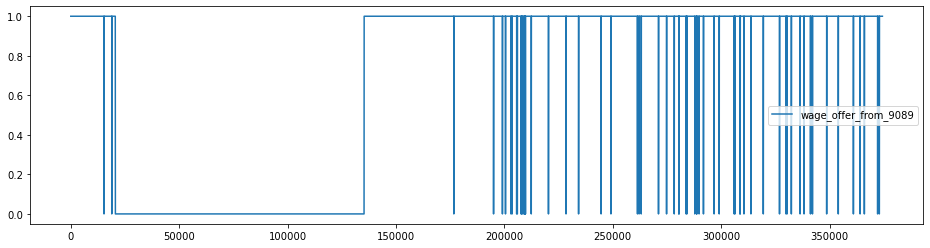

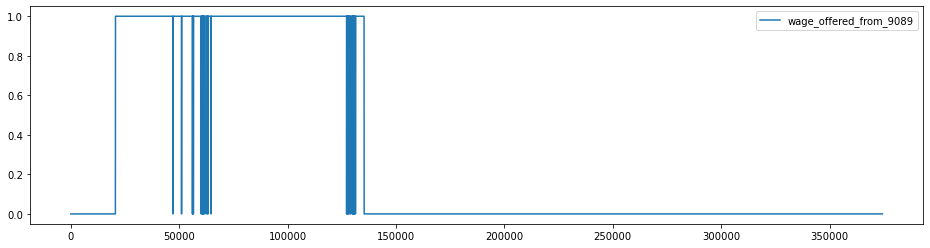

In [56]:
modules.print_count_of_values_relation(visas_df, True, True)

To explain the resulting graphs:
The X-Axis shows the index of all values. We have over 350000 values (rows) in our dataset.
The Y-Axis shows if a row is filled with a actual value. Not NaN Values are displayed as 1, NaN values are displayed as 0.

It becomes aparent that both columnscomplete each other. Gaps in wage_offer_from_9098 can be filled with wage_offer_from_9098.

----
## Cleaning up `wage_offer_from_9089`

In Progress of our data analysis it became apparent, that wage_offer_from_9089 has to be cleaned up, before analyzing the contained data.

In [57]:
cleanup_df = visas_df.copy()
cleanup_df.dtypes

wage_offer_from_9089       object
wage_offered_from_9089    float64
dtype: object

Originally all the imported rows were recognized as "object". But the values should be converted to float values.

In [58]:
# cleanup_df["wage_offer_from_9089"].astype('float')

First, we tried to convert the data, by applying the new type.

In [59]:
cleanup_df["wage_offer_from_9089"].apply(type)

0         <class 'float'>
1         <class 'float'>
2         <class 'float'>
3         <class 'float'>
4         <class 'float'>
               ...       
374357      <class 'str'>
374358      <class 'str'>
374359      <class 'str'>
374360      <class 'str'>
374361      <class 'str'>
Name: wage_offer_from_9089, Length: 374362, dtype: object

We defined a new columnn, containing the types of all newly converted values.

In [60]:
cleanup_df['wage_Type'] = cleanup_df["wage_offer_from_9089"].apply(lambda x: type(x).__name__)

In [61]:

cleanup_df.head()

,wage_offer_from_9089,wage_offered_from_9089,wage_Type
0,75629,NaN,float
1,37024,NaN,float
2,47923,NaN,float
3,10.97,NaN,float
4,100000,NaN,float


In [62]:
import modules

In [63]:
importlib.reload(modules)
modules.print_full(cleanup_df.sample(100))

       wage_offer_from_9089  wage_offered_from_9089 wage_Type
271001                 8.09                     NaN     float
210932            78,978.00                     NaN       str
320137               100150                     NaN     float
102813                  NaN                97150.00     float
357404            88,000.00                     NaN       str
138061            87,589.00                     NaN       str
290430               158579                     NaN     float
277621                37000                     NaN     float
112969                  NaN               250000.00     float
370957            75,421.00                     NaN       str
233730                17909                     NaN     float
191220           115,000.00                     NaN       str
132799                  NaN               127920.00     float
239145               102523                     NaN     float
310394                75000                     NaN     float
248772  

It became apparent, that apllying the new type was partially successful. But values containing delimiters or seperators are still recognized as a string.

In [64]:

cleanup_df['wage_Type'].value_counts()

float    258181
str      116181
Name: wage_Type, dtype: int64

We defined a new function to remove the delimiters. Additionally we replaced the '#############' values, which occured two times, with NaN.

In [65]:
def clean_currency(x):
    """ If the value is a string, then remove delimiters
    otherwise, the value is numeric and can be converted.

    """
    if isinstance(x, str):
        if x == '#############':
            x = np.nan
        else:
            return(x.replace(',', ''))
    return(x)

In [66]:
cleanup_df["wage_offer_from_9089"] = cleanup_df["wage_offer_from_9089"].apply(clean_currency).astype('float')
cleanup_df['wage_Type'] = cleanup_df["wage_offer_from_9089"].apply(lambda x: type(x).__name__)

In [67]:

cleanup_df['wage_Type'].value_counts()

float    374362
Name: wage_Type, dtype: int64

In [68]:

modules.print_full(cleanup_df.sample(100))

        wage_offer_from_9089  wage_offered_from_9089 wage_Type
1637                80000.00                     NaN     float
55815                    NaN                 88254.0     float
227738             215000.00                     NaN     float
154907              90000.00                     NaN     float
188867              94432.00                     NaN     float
66552                    NaN                121202.0     float
59615                    NaN                 38000.0     float
236436              83500.00                     NaN     float
169311             115000.00                     NaN     float
112718                   NaN                140000.0     float
77327                    NaN                 80000.0     float
111740                   NaN                 70000.0     float
265148              16848.00                     NaN     float
166332             126048.00                     NaN     float
59013                    NaN                 90000.0   

Perfect, all values are now converted to float. The column `wage_offer_from_9089` was successfully cleaned up.

In [69]:
cleanup_df['wage_offer_from_9089'].median()

91104.0

In [70]:
visas_df['wage_offer_from_9089'] = cleanup_df['wage_offer_from_9089']
del cleanup_df

In [71]:
visas_df.sample(15)

,wage_offer_from_9089,wage_offered_from_9089
244277,96000.0,NaN
149400,110032.0,NaN
319195,103626.0,NaN
103751,NaN,124994.0
295619,120453.0,NaN
355997,110000.0,NaN
10382,59319.0,NaN
119515,NaN,101000.0
153495,47486.0,NaN
322085,121202.0,NaN


In [72]:
## Merging both columns

All NaN values wil lbe filled with 0 in order to sum both columns up.
We saw earlier thar both columns never overlap.

In [73]:
visas_df['wage_offer_merged'] = visas_df['wage_offer_from_9089'].fillna(0) + visas_df['wage_offered_from_9089'].fillna(0)

In [74]:
visas_df.sample(15)

,wage_offer_from_9089,wage_offered_from_9089,wage_offer_merged
341034,123490.0,NaN,123490.00
67048,NaN,72592.00,72592.00
207663,85571.0,NaN,85571.00
324580,103792.0,NaN,103792.00
189046,105498.0,NaN,105498.00
23211,NaN,100000.00,100000.00
165520,108000.0,NaN,108000.00
183658,86800.0,NaN,86800.00
327109,61506.0,NaN,61506.00
186724,117150.0,NaN,117150.00


In [75]:
visas_df['wage_offer_merged'].dtype

dtype('float64')

In [76]:
(visas_df['wage_offer_merged'] == 0).sum()

126

We filled NaN values with 0 in Order to calculate sums. Now we will replaye 0 with NaN to keep the columns cleaned up.
Additionally a wage of 0 would be unrealistic.

In [77]:
visas_df['wage_offer_merged'].replace(0, np.nan, inplace=True)

In [78]:
(visas_df['wage_offer_merged'] == 0).sum()

0

In [79]:
visas_df['wage_offer_merged'].median()
clean_df = pd.DataFrame()
clean_df['wage_offer_merged'] = visas_df['wage_offer_merged']

In [80]:
clean_df.head()


,wage_offer_merged
0,75629.00
1,37024.00
2,47923.00
3,10.97
4,100000.00


---
# Cleaning up wage_offer_unit

In [81]:
col_list= ["wage_offer_unit_of_pay_9089", "wage_offered_unit_of_pay_9089"]
visas_df = pd.read_csv("../data/us_perm_visas.csv", usecols=col_list)
visas_df.head ()

C:\Users\andre\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (150,153) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,wage_offer_unit_of_pay_9089,wage_offered_unit_of_pay_9089
0,yr,NaN
1,yr,NaN
2,yr,NaN
3,hr,NaN
4,yr,NaN


In [82]:
visas_df.sample(50)

,wage_offer_unit_of_pay_9089,wage_offered_unit_of_pay_9089
292674,Year,NaN
334749,Year,NaN
117642,NaN,Year
113692,NaN,Year
69578,NaN,Year
242338,Year,NaN
205298,Year,NaN
85228,NaN,Year
132911,NaN,Year
30491,NaN,NaN


In [83]:
visas_df['wage_offer_unit_of_pay_9089'].value_counts()

Year         230591
yr            19733
Hour           7038
hr              781
Week            142
Month            81
wk               30
mth              21
Bi-Weekly        20
bi                9
Name: wage_offer_unit_of_pay_9089, dtype: int64

In [84]:
visas_df['wage_offered_unit_of_pay_9089'].value_counts()

Year         68950
Hour          1651
Week            58
Month           39
Bi-Weekly        1
Name: wage_offered_unit_of_pay_9089, dtype: int64

wage_offer_unit_of_pay_9089 has to be cleaned. We'll deal with this issue after the merge.

wage_offer_unit_of_pay_9089
258446/374362 69%
Filled: |██████████████████████████████████----------------| 69.0% Rows

wage_offered_unit_of_pay_9089
70699/374362 19%
Filled: |█████████-----------------------------------------| 18.9% Rows



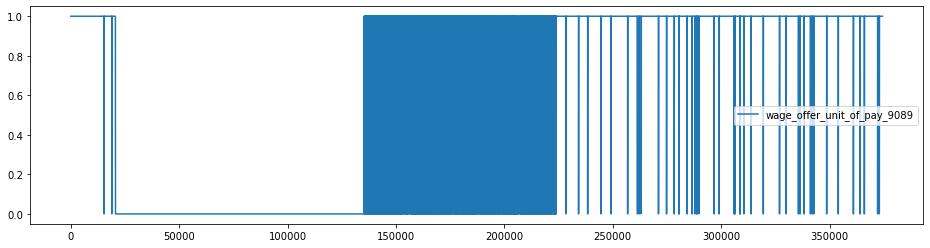

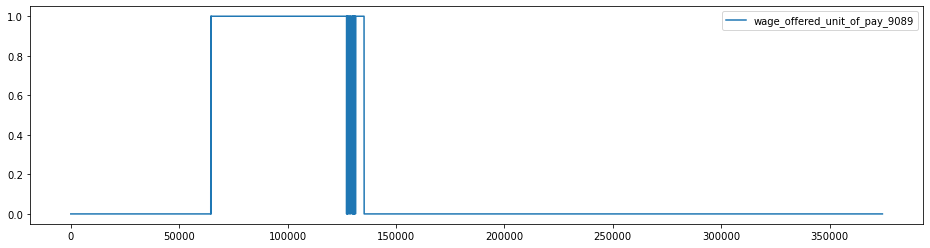

In [85]:
modules.print_count_of_values_relation(visas_df, True, True)

The dristribution of values reveals a problem. Between an index of 25.000 and 75.000 or dataset contains no value for the unit of pay.

We will merge the both columns and take a closer look at the values they are containing.

In [86]:
visas_df['wage_offer_unit_merged'] = visas_df['wage_offer_unit_of_pay_9089'].fillna('') + visas_df['wage_offered_unit_of_pay_9089'].fillna('')

In [87]:
visas_df['wage_offer_unit_merged'].replace('', np.nan, inplace=True)

In [88]:
visas_df['wage_offer_unit_merged'].value_counts()

Year         299541
yr            19733
Hour           8689
hr              781
Week            200
Month           120
wk               30
Bi-Weekly        21
mth              21
bi                9
Name: wage_offer_unit_merged, dtype: int64

In [89]:
unit_abbreviations = {
  "Year": "yr",
  "Month": "mth",
  "Bi-Weekly": "bi",
  "Week": "wk",
  "Hour": "hr"
}

In [90]:
visas_df['wage_offer_unit_merged'] = visas_df['wage_offer_unit_merged'].replace(unit_abbreviations)

In [91]:
visas_df['wage_offer_unit_merged'].value_counts()

yr     319274
hr       9470
wk        230
mth       141
bi         30
Name: wage_offer_unit_merged, dtype: int64

wage_offer_unit_of_pay_9089
258446/374362 69%
Filled: |██████████████████████████████████----------------| 69.0% Rows

wage_offered_unit_of_pay_9089
70699/374362 19%
Filled: |█████████-----------------------------------------| 18.9% Rows

wage_offer_unit_merged
329145/374362 88%
Filled: |███████████████████████████████████████████-------| 87.9% Rows



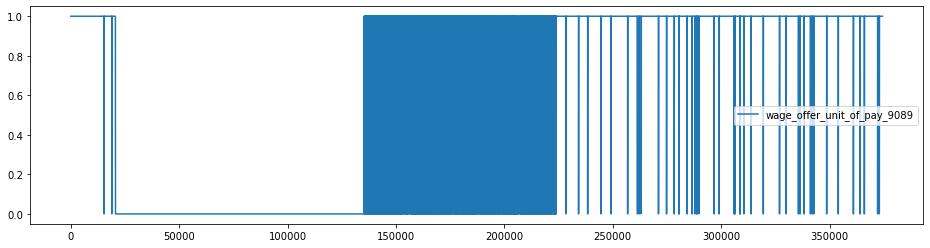

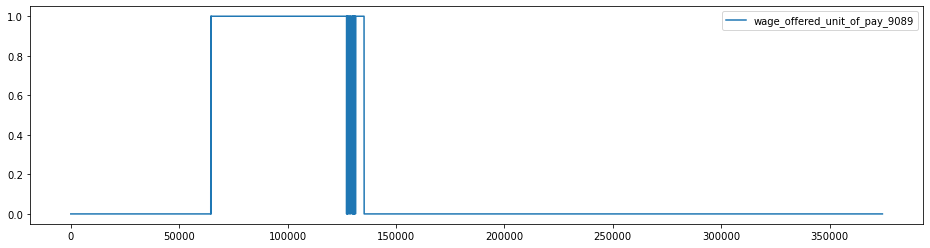

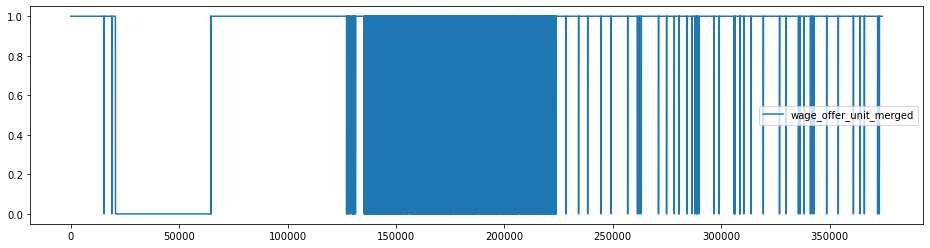

In [92]:

modules.print_count_of_values_relation(visas_df, True, True)

The gap remains, considering the gap is realtively small and we have lot's of values, we'll ignore the gap in the further analysis.


In [93]:
clean_df['wage_offer_unit'] = visas_df['wage_offer_unit_merged']

In [94]:

clean_df.head()

,wage_offer_merged,wage_offer_unit
0,75629.00,yr
1,37024.00,yr
2,47923.00,yr
3,10.97,hr
4,100000.00,yr


In [95]:
clean_df.groupby('wage_offer_unit')['wage_offer_merged'].mean().sort_values()

wage_offer_unit
hr       221.303376
bi      1634.519655
mth     9005.593357
wk     11315.946130
yr     96487.857970
Name: wage_offer_merged, dtype: float64

In [96]:

modules.print_full(clean_df.groupby('wage_offer_unit')['wage_offer_merged'].describe())

                    count          mean           std      min       25%  \
wage_offer_unit                                                            
bi                   29.0   1634.519655   1800.303267     8.00    620.00   
hr                 9464.0    221.303376   4614.520453     6.55      8.91   
mth                 140.0   9005.593357  16935.140095   800.00   2837.50   
wk                  230.0  11315.946130  32412.952643     1.00    420.25   
yr               319266.0  96487.857970  82671.176121  2200.60  74402.00   

                     50%          75%         max  
wage_offer_unit                                    
bi                1360.0    1920.0000     10000.0  
hr                  11.6      34.0000    188000.0  
mth               5000.0    7785.3350    141000.0  
wk                 800.0    1788.4675    224000.0  
yr               92664.0  114192.0000  13285000.0  


In [97]:

modules.print_full(clean_df.groupby('wage_offer_unit')['wage_offer_merged'].nlargest(10))

wage_offer_unit        
bi               18837        10000.00
                 281821        2992.33
                 338278        2500.00
                 372923        2500.00
                 17802         2134.50
                 264059        2115.38
                 3577          2000.00
                 260057        1920.00
                 348020        1870.00
                 358656        1870.00
hr               349488      188000.00
                 17630       158828.80
                 276889      135637.00
                 107163      134534.00
                 270788      115795.00
                 271939      115795.00
                 274251      115795.00
                 134072      106080.00
                 250626      105000.00
                 9219         86070.00
mth              331286      141000.00
                 227399      115149.00
                 233941       80000.00
                 230390       45000.00
                 130654       28746.00
 

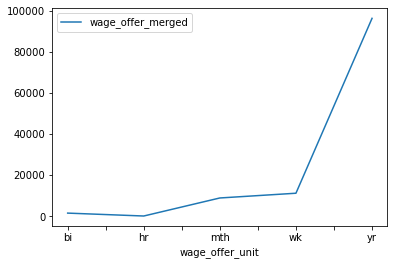

In [98]:
clean_df.groupby('wage_offer_unit')['wage_offer_merged'].mean().plot()
plt.legend(loc="upper left")
plt.show()

This is unexpected. It was expeced, that hr > week > bi > mth > yr.
Anyway we'll leave all units besides yr unseen and concentrate on yr, which has the most occurences.

<AxesSubplot:ylabel='wage_offer_unit'>

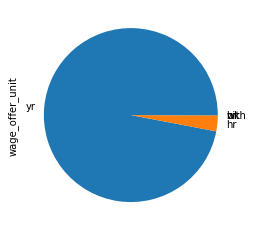

In [99]:
clean_df['wage_offer_unit'].value_counts().plot(kind='pie')

Filter all not yr values

In [100]:
new_df = clean_df[clean_df["wage_offer_unit"].str.contains("yr", na=False)]

In [101]:
clean_df.dtypes

wage_offer_merged    float64
wage_offer_unit       object
dtype: object

In [102]:
new_df["wage_offer_unit"].size

319274

In [103]:
new_df.value_counts()

wage_offer_merged  wage_offer_unit
90000.00           yr                 3499
110000.00          yr                 3041
100000.00          yr                 3038
120000.00          yr                 3015
72467.00           yr                 2839
                                      ... 
105487.00          yr                    1
105489.00          yr                    1
105494.00          yr                    1
105499.89          yr                    1
2200.60            yr                    1
Length: 32662, dtype: int64

This is unexpected. It was expeced, that hr > week > bi > mth > yr.
Anyway we'll leave all units besides yr unseen and concentrate on yr, which has the most occurences.

<AxesSubplot:ylabel='wage_offer_unit'>

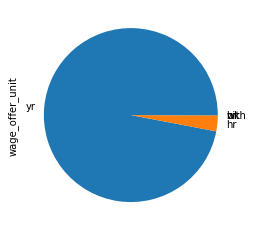

In [104]:
clean_df['wage_offer_unit'].value_counts().plot(kind='pie')

Filter all not yr values

In [105]:
new_df = clean_df[clean_df["wage_offer_unit"].str.contains("yr", na=False)]

In [106]:
clean_df.dtypes

wage_offer_merged    float64
wage_offer_unit       object
dtype: object

In [107]:
new_df["wage_offer_unit"].size

319274

In [108]:
new_df.value_counts()

wage_offer_merged  wage_offer_unit
90000.00           yr                 3499
110000.00          yr                 3041
100000.00          yr                 3038
120000.00          yr                 3015
72467.00           yr                 2839
                                      ... 
105487.00          yr                    1
105489.00          yr                    1
105494.00          yr                    1
105499.89          yr                    1
2200.60            yr                    1
Length: 32662, dtype: int64

-----------------------

# Unplausible Werte

In [110]:
import cleanup
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('../own_style.mplstyle')
from scipy.stats import linregress

In [111]:
# cleanup.generate_cleaned_df()

In [116]:

col_list = ["prevailing_wage_amount_9089", "prevailing_wage_unit_of_pay_9089"]
visas_df = pd.read_csv('../data/us_perm_visas_cleaned.csv', usecols=col_list)

In [122]:
modules.print_full(visas_df.groupby('prevailing_wage_unit_of_pay_9089')['prevailing_wage_amount_9089'].nsmallest(20))

prevailing_wage_unit_of_pay_9089        
bi                                310505       8.00
                                  61147       14.15
                                  308766     125.00
                                  235563     400.00
                                  18010      600.00
                                  199471     620.00
                                  203295     620.00
                                  203302     620.00
                                  61206      833.33
                                  286511     850.00
                                  656       1033.60
                                  1029      1200.00
                                  329841    1359.62
                                  229946    1365.00
                                  133080    1649.35
                                  244427    1649.35
                                  264059    1668.35
                                  328383    1799.23
                       

In [120]:
visas_df["prevailing_wage_unit_of_pay_9089"].value_counts()

yr     364080
hr       8345
wk        207
mth       130
bi         28
Name: prevailing_wage_unit_of_pay_9089, dtype: int64